In [1]:
def extract_subject_id(file_name):
    start_idx = file_name.index('S')    # Index of first string starting with s
    end_idx = file_name.index('.nii.gz') 
    return file_name[start_idx:end_idx]

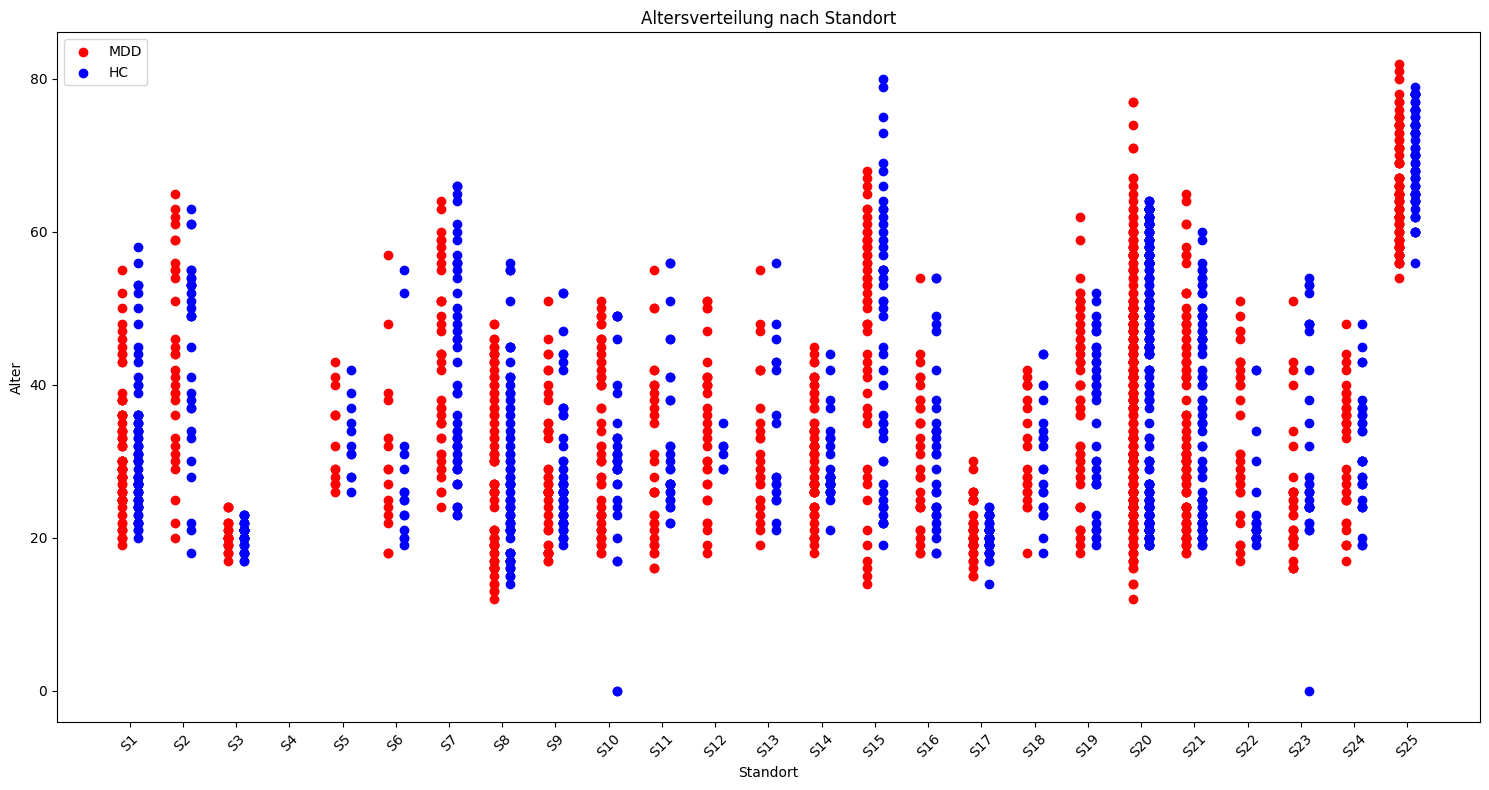

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_mdd = df1
df_hc = df2

# extract sites
df_mdd['Location'] = df_mdd['ID'].str.split('-').str[0]
df_hc['Location'] = df_hc['ID'].str.split('-').str[0]

# sort
df_mdd = df_mdd.sort_values(by='Location')
df_hc = df_hc.sort_values(by='Location')

# plot
fig, ax = plt.subplots(figsize=(15, 8))

# sort sites
sorted_locations = [f'S{i}' for i in range(1, 26)]
location_indices = np.arange(len(sorted_locations))

# for MDD
mdd_plotted = False
for idx, location in enumerate(sorted_locations):
    group = df_mdd[df_mdd['Location'] == location]
    x_values = [idx - 0.15] * len(group)
    if not mdd_plotted:
        ax.scatter(x_values, group['Age'], color='red', label='MDD')
        mdd_plotted = True
    else:
        ax.scatter(x_values, group['Age'], color='red')

# for HC
hc_plotted = False
for idx, location in enumerate(sorted_locations):
    group = df_hc[df_hc['Location'] == location]
    x_values = [idx + 0.15] * len(group)
    if not hc_plotted:
        ax.scatter(x_values, group['Age'], color='blue', label='HC')
        hc_plotted = True
    else:
        ax.scatter(x_values, group['Age'], color='blue')

ax.set_xlabel('Standort')
ax.set_ylabel('Alter')
ax.set_title('Altersverteilung nach Standort')
ax.set_xticks(location_indices)
ax.set_xticklabels(sorted_locations)
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# data preparation
import pandas as pd

excel_file = '/path_to/REST-meta-MDD-PhenotypicData_WithHAMDSubItem_V4.xlsx'

sheet1_name = 'MDD'
sheet2_name = 'Controls'

df1 = pd.read_excel(excel_file, sheet_name=sheet1_name)
df2 = pd.read_excel(excel_file, sheet_name=sheet2_name)

# subjects older than 65 years or younger than 18 years

In [48]:
id_list_one = []

for index, row in df1.iterrows():
    if row['Age'] > 60 or row['Age'] < 15:
        id_list.append(row['ID'])
        id_list_one.append(row['ID'])
        
for index, row in df2.iterrows():
    if row['Age'] > 60 or row['Age'] < 15:
        id_list.append(row['ID'])
        id_list_one.append(row['ID'])

# Subjects with missing information on age, sex or education

In [50]:
id_list_two = []

for index, row in df1.iterrows():
    if row['Sex'] == 0:
        if row['ID'] not in id_list:
            id_list.append(row['ID'])
            id_list_two.append(row['ID'])

for index, row in df2.iterrows():
    if row['Sex'] == 0:
        if row['ID'] not in id_list:
            id_list.append(row['ID'])
            id_list_two.append(row['ID'])
        
for index, row in df1.iterrows():
    if row['Age'] == 0:
        if row['ID'] not in id_list:
            id_list.append(row['ID'])
            id_list_two.append(row['ID'])

for index, row in df2.iterrows():
    if row['Age'] == 0:
        if row['ID'] not in id_list:
            id_list.append(row['ID'])
            id_list_two.append(row['ID'])
            
for index, row in df1.iterrows():
    if row['Education (years)'] == 0:
        if row['ID'] not in id_list:
            id_list.append(row['ID'])
            id_list_two.append(row['ID'])

for index, row in df2.iterrows():
    if row['Education (years)'] == 0:
        if row['ID'] not in id_list:
            id_list.append(row['ID'])
            id_list_two.append(row['ID'])

# Low quality images with bad coverage, poor spatial normalization or excessive head motion

## bad coverage

In [12]:
# packages
import numpy as np
import nibabel as nib
import scipy.io
import os
import re

In [13]:
# same shape
folder_path = '/path_to/Masks/AutoMasks'
num = 0
bad_coverage = []
group_mask = np.zeros((61, 73, 61))

for j, file_name in enumerate(os.listdir(folder_path)):
    if file_name.startswith("wAutoMask"):
        num += 1
        nii_img = nib.load(os.path.join(folder_path, file_name))
        nii_data = nii_img.get_fdata()
        group_mask += nii_data
        
group_mask = group_mask/num

In [26]:
group_mask[30,30,30]

0.9843225586159029

In [15]:
np.sum(group_mask)

75740.10445252403

In [14]:
#coverage
num_outlier85 = 0
for j, file_name in enumerate(os.listdir(folder_path)):
    if file_name.startswith("wAutoMask"):
        nii_img = nib.load(os.path.join(folder_path, file_name))
        nii_data = nii_img.get_fdata()
        one_mask = group_mask * nii_data
        coverage = np.sum(one_mask)/np.sum(nii_data)
      
        if coverage < 0.70:
            num_outlier85 += 1
            bad_coverage.append(file_name)
print(num_outlier85)

338


In [54]:
id_list_three = []
for file_name in bad_coverage:
    subject_id = extract_subject_id(file_name)
    if subject_id not in id_list:
        id_list.append(subject_id)
        id_list_three.append(subject_id)

## poor spatial normalization

## excessive head motion

In [33]:
subject_ids[100]

'S2-1-0018'

In [56]:
len(id_list)

889

In [55]:
id_list_four = []
folder_path = '/path_to/data/RealignParameter'
subfolders = [f for f in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, f))]
for num_sub, file_name in enumerate(subfolders):
    for file_name2 in os.listdir(folder_path + '/' + file_name):
        if file_name2.startswith("FD_Power"):
            data_array = np.loadtxt(folder_path + '/' + file_name + '/' + file_name2)
            if round(np.mean(data_array), 2) > 0.2:
                if file_name not in id_list:
                    id_list.append(file_name)
                    id_list_four.append(file_name)

# spatial correlation < 0.6 (a threshold defined by mean - 2SD) between each subject's ReHo map and the group mean Reho map

In [20]:
# Packages
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import scipy.io
import os

In [58]:
# Subjects with spatial correlation < 0.6 (a threshold defined by mean - 2SD) between each subjects ReHo map and the group mean Reho map
folder_path = '/path_to/Results/ReHo_FunImgARCWF'
group_sum = np.zeros((61, 73, 61))
for num_sub, file_name in enumerate(os.listdir(folder_path)):
    nii_img = nib.load(os.path.join(folder_path, file_name))
    nii_data = nii_img.get_fdata()
    group_sum += nii_data

group_mean = group_sum/num_sub

In [59]:
id_list_five = []
num_reho = 0
group_mean = group_mean.reshape(-1) 
for num_sub, file_name in enumerate(os.listdir(folder_path)):
    nii_img = nib.load(os.path.join(folder_path, file_name))
    nii_data = nii_img.get_fdata()
    nii_data = nii_data.reshape(-1) 
    correlation_matrix = np.corrcoef(group_mean, nii_data)
    
    if correlation_matrix[0, 1] < 0.7:
        subject_id = extract_subject_id(file_name)
        if subject_id not in id_list:
            id_list.append(subject_id)
            id_list_five.append(subject_id)
        num_reho += 1
print(num_reho)

20


In [23]:
len(id_list)

745

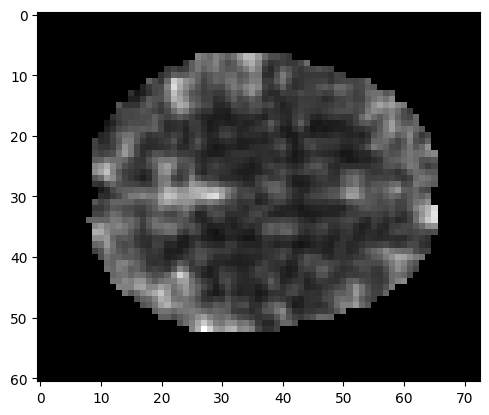

In [8]:
#example image:
plt.imshow(nii_data[:, :, nii_data.shape[2] // 2], cmap='gray')

# Sites with subjects fewer than 10 in either MDD or HC group

In [25]:
# sites with subjects fewer than 10 in either MDD or HC group
list_names = []
for index, row in df1.iterrows():
    list_names.append(row['ID'])
    
for index, row in df2.iterrows():
    list_names.append(row['ID'])

In [26]:
def count_prefix_occurrences(string_list):
    prefix_count_dict = {}

    for string in string_list:
        parts = string.split("-")
        prefix = parts[0]
        if prefix not in prefix_count_dict:
            prefix_count_dict[prefix] = {"{}-1".format(prefix): 0, "{}-2".format(prefix): 0}

        number = int(parts[1])
        prefix_count_dict[prefix]["{}-{}".format(prefix, number)] += 1

    return prefix_count_dict

def print_prefixes_with_condition(prefix_count_dict):
    for prefix, counts in prefix_count_dict.items():
        count_1 = counts["{}-1".format(prefix)]
        count_2 = counts["{}-2".format(prefix)]

        if count_1 < 10 or count_2 < 10:
            print(prefix)

In [27]:
len(list_names)

2380

In [28]:
list_names = [x for x in list_names if x not in id_list]

In [29]:
result_dict = count_prefix_occurrences(list_names)

print(result_dict)
print_prefixes_with_condition(result_dict)

{'S1': {'S1-1': 54, 'S1-2': 50}, 'S6': {'S6-1': 10, 'S6-2': 14}, 'S8': {'S8-1': 70, 'S8-2': 70}, 'S10': {'S10-1': 32, 'S10-2': 21}, 'S11': {'S11-1': 32, 'S11-2': 29}, 'S12': {'S12-1': 28, 'S12-2': 5}, 'S13': {'S13-1': 18, 'S13-2': 14}, 'S14': {'S14-1': 58, 'S14-2': 31}, 'S15': {'S15-1': 40, 'S15-2': 40}, 'S16': {'S16-1': 28, 'S16-2': 0}, 'S17': {'S17-1': 44, 'S17-2': 44}, 'S19': {'S19-1': 20, 'S19-2': 35}, 'S20': {'S20-1': 245, 'S20-2': 212}, 'S21': {'S21-1': 66, 'S21-2': 56}, 'S23': {'S23-1': 30, 'S23-2': 25}, 'S24': {'S24-1': 30, 'S24-2': 31}, 'S25': {'S25-1': 59, 'S25-2': 49}, 'S9': {'S9-1': 0, 'S9-2': 48}}
S12
S16
S9


In [60]:
id_list_six = []
for s in list_names: 
    if s.startswith('S12'):
        if s not in id_list:
            id_list.append(s)
            id_list_six.append(s)
    elif s.startswith('S16'):
        if s not in id_list:
            id_list.append(s)
            id_list_six.append(s)
    elif s.startswith('S25'):
        if s not in id_list:
            id_list.append(s)
            id_list_six.append(s)

# Subjects from site 25 which mainly contained patients with geriatric depression 

# Subjects from site 4 which was a duplicate dataset

In [ ]:
id_list_seven = []
folder_path = '/path_to/ROISignals_FunImgARCWF'
strings_list = []
for i, file_name in enumerate(os.listdir(folder_path)):
    if i % 2 == 0:
        substrings_to_remove = ['.mat', 'ROISignals_'] 
        for substr in substrings_to_remove:
            file_name = file_name.replace(substr, '')
        s = file_name
        if s.startswith('S4'):
            if s not in id_list:
                id_list.append(s)
                id_list_seven.append(s)
                print(s)

In [63]:
len(id_list_seven)

45

# Images with zero signals detected in targeted atlas

In [37]:
# Packages
import numpy as np
import pandas as pd
import scipy.io
import os

In [ ]:
folder_path = '/path_to/ROISignals_FunImgARCWF'
strings_list = []
id_list_eight = []
for i, file_name in enumerate(os.listdir(folder_path)):
    if i % 2 == 0:
        mat = scipy.io.loadmat(os.path.join(folder_path, file_name))
        matrix = mat['ROISignals']
        data = pd.DataFrame(matrix)

        aal_df = data.iloc[:, :116]       # 1~116: Automated Anatomical Labeling (AAL) atlas (Tzourio-Mazoyer et al., 2002)
        #hoac_df = data.iloc[:, 116:212]   # 117~212: Harvard-Oxford atlas (Kennedy et al., 1998)– cortical areas
        #hoas_df = data.iloc[:, 212:228]   # 213~228: Harvard-Oxford atlas (Kennedy et al., 1998)– subcortical areas
        #ccl_df = data.iloc[:, 228:428]    # 229~428: Craddock’s clustering 200 ROIs (Craddock et al., 2012)
        #zrp_df = data.iloc[:, 428:1408]   # 429~1408: Zalesky’s random parcelations (compact version: 980 ROIs) (Zalesky et al., 2010)
        #dbf_df = data.iloc[:, 1408:1568]  # 1409~1568: Dosenbach’s 160 functional ROIs (Dosenbach et al., 2010)

        aal_array = aal_df.to_numpy()
        #hoac_array = hoac_df.to_numpy()
        #hoas_array = hoas_df.to_numpy()
        #ccl_array = ccl_df.to_numpy()
        #zrp_array = zrp_df.to_numpy()
        #dbf_array = dbf_df.to_numpy()

        for column in range(aal_array.shape[1]):
            if np.sum(aal_array[:,column])==0:

                substrings_to_remove = ['.mat', 'ROISignals_'] 
                for substr in substrings_to_remove:
                    file_name = file_name.replace(substr, '')

                if file_name not in id_list:
                    id_list.append(file_name)
                    id_list_eight.append(file_name)
        #print(f'----{file_name} Done!')

In [45]:
len(id_list_eight)

40

In [44]:
id_list_eight = id_list[959:]

# Saving

In [40]:
import pickle

def save_list_to_file(file_path, data_list):
    with open(file_path, 'wb') as file:
        pickle.dump(data_list, file)

def load_list_from_file(file_path):
    with open(file_path, 'rb') as file:
        data_list = pickle.load(file)
    return data_list

In [84]:
save_list_to_file('id_list_without_8.pkl', id_list)

In [66]:
print(len(id_list))
print(len(id_list_one))
print(len(id_list_two))
print(len(id_list_three))
print(len(id_list_four))
print(len(id_list_five)) # not necessary
print(len(id_list_six))
print(len(id_list_seven))
print(len(id_list_eight))

1015
221
144
311
213
0
81
45
40


In [82]:
id_list = id_list_one+id_list_two+id_list_three+id_list_four+id_list_six+id_list_seven

In [83]:
len(id_list)

1015

# compare different datasets

In [89]:
file_path = './first_id_list.pkl'
files = load_list_from_file(file_path)

In [90]:
len(files)

898

In [91]:
#packages
from nilearn.connectome import ConnectivityMeasure
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
#from neuroHarmonize import harmonizationLearn
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
import community
import scipy.io
import math
import re
import os
import pickle

In [95]:
def filter_strings_not_in_list(strings_list, substrings_list):
    filtered_list = []
    for s in strings_list:
        if not any(substring in s for substring in substrings_list):
            filtered_list.append(s)
    return filtered_list
folder_path = '/path_to/ROISignals_FunImgARCWF'  # Pfad zum Ordner
#folder_path = '/path_to/ROISignals_FunImgARglobalCWF'
strings_list = []
for i, file_name in enumerate(os.listdir(folder_path)):
    if i % 2 == 0:
        strings_list.append(file_name)
    
with open(file_path, 'rb') as file:
    data_list_substrings = pickle.load(file)

filtered_list = filter_strings_not_in_list(strings_list, data_list_substrings)
print("----Loading Filenames Done")
labels = []

for h, file_name in enumerate(filtered_list[:1300]):
    pattern = r"S\d+"
    match = re.search(pattern, file_name)
    s_part = match.group()[1:]
    t_wind = 0
    end_t = 0
    
    if int(s_part) != 16:
        if int(s_part) != 25:
            #if int(file_name.split('-')[1]) == 1:
            mat = scipy.io.loadmat(os.path.join(folder_path, file_name))
            matrix = mat['ROISignals']

            aal_array = matrix[:, :116]       # 1~116: Automated Anatomical Labeling (AAL) atlas (Tzourio-Mazoyer et al., 2002)
            #hoac_array = matrix[:, 116:212]   # 117~212: Harvard-Oxford atlas (Kennedy et al., 1998)– cortical areas
            #hoas_array = matrix[:, 212:228]   # 213~228: Harvard-Oxford atlas (Kennedy et al., 1998)– subcortical areas
            #ccl_array = matrix[:, 228:428]    # 229~428: Craddock’s clustering 200 ROIs (Craddock et al., 2012)
            #zrp_array = matrix[:, 428:1408]   # 429~1408: Zalesky’s random parcelations (compact version: 980 ROIs) (Zalesky et al., 2010)
            #dbf_array = matrix[:, 1408:1568]  # 1409~1568: Dosenbach’s 160 functional ROIs (Dosenbach et al., 2010)

            correlation_measure = ConnectivityMeasure(kind='correlation')
            corr_matrix = correlation_measure.fit_transform([aal_array])[0]
            np.fill_diagonal(corr_matrix, 0)
            upper_triangle = np.triu(corr_matrix, k=1)
            upper_triangle_vector = upper_triangle[np.triu_indices_from(upper_triangle)]

            labels.append(int(file_name.split('-')[1]))

            if h == 0:
                corrs_array = upper_triangle_vector
            else:
                corrs_array = np.vstack((corrs_array,upper_triangle_vector))
            if (h+1) % 200 == 0:
                print(f'----{h+1} Done!')

----Loading Filenames Done
----200 Done!
----400 Done!
----600 Done!
----800 Done!
----1000 Done!
----1200 Done!


In [98]:
corrs_array.shape

(1240, 6786)

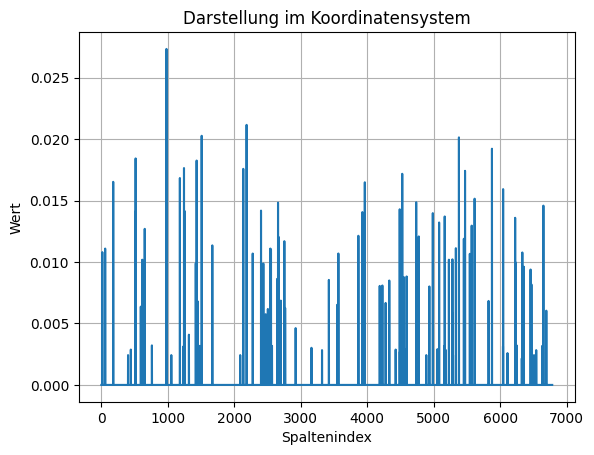

In [99]:
# packages
from sklearn.tree import DecisionTreeClassifier
X = corrs_array
y = np.array(labels)

tree = DecisionTreeClassifier()
tree.fit(X, y)

# Gini Importance Score
importance = tree.feature_importances_
data = importance

x = np.arange(X.shape[1])

plt.figure()
plt.plot(x, data)
plt.xlabel('Spaltenindex')
plt.ylabel('Wert')
plt.title('Darstellung im Koordinatensystem')
plt.grid(True)
plt.show()

In [ ]:
# packages
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier  # Import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, auc, roc_curve

num_of_features = [40,35,30,25,20,15]
for threshold_num in num_of_features:
    indices_of_largest_values = np.argsort(data)[-threshold_num:]

    features = X[:,indices_of_largest_values]
    labels = y
    
    #fpath = 'path/for/feature/file/(csv)'
    #lpath = 'path/for/label/file/(csv)'
    seed = 81 # random seed
    no_folds = 10 # number of folds in out_loop
    no_nested_folds = 10 # number of folds in nested_loop

    skf = StratifiedKFold(n_splits=no_folds, shuffle=True, random_state=seed)
    nested_skf = StratifiedKFold(n_splits=no_nested_folds, shuffle=True)
    param_grid = {'n_estimators': [50, 100, 300, 1000], 'max_depth': [None, 10, 30, 100]}  # Modify parameter grid for RandomForestClassifier
    eval_metrics = np.zeros((skf.n_splits, 4))
    print('Loading data ...')
    # features = np.loadtxt(fpath, delimiter=',')
    # labels = np.loadtxt(lpath, dtype='int32')

    print(f'Finished Threshold {threshold_num} Features')
    print(f'{np.sum(labels == 1)} MDD & {np.sum(labels == 2)} HC')

    # ROC plotting preparation
    TPR, AUC = [], []
    mean_fpr = np.linspace(0, 1, 100)

    for n_cv, (train_ind, test_ind) in enumerate(skf.split(features, labels)):
        print('Processing the No.%i cross-validation in %i-fold CV' % (n_cv + 1, skf.n_splits))
        x_train, y_train = features[train_ind, ], labels[train_ind, ]
        x_test, y_test = features[test_ind, ], labels[test_ind, ]

        # Training
        init_clf = RandomForestClassifier(random_state=seed)
        grid = GridSearchCV(init_clf, param_grid, cv=nested_skf, scoring='accuracy', n_jobs=5)
        grid.fit(x_train, y_train)
        print('----The best parameters: n_estimators=%d, max_depth=%s with accuracy of %f' % (
            grid.best_params_['n_estimators'], grid.best_params_['max_depth'], grid.best_score_))

        clf = RandomForestClassifier(n_estimators=grid.best_params_['n_estimators'],
                                     max_depth=grid.best_params_['max_depth'],
                                     random_state=seed)
        clf.fit(x_train, y_train)
        y_predict = clf.predict(x_test)
        y_proba = clf.predict_proba(x_test)

        # ROC information for each fold
        cv_fpr, cv_tpr, cv_thresholds = roc_curve(y_test, y_proba[:, 1], pos_label=2)
        cv_auc = auc(cv_fpr, cv_tpr)
        interp_tpr = np.interp(mean_fpr, cv_fpr, cv_tpr)
        interp_tpr[0] = 0.0
        TPR.append(interp_tpr)
        AUC.append(cv_auc)

        # Evaluation
        tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
        cv_accuracy = (tn + tp) / (tn + fp + fn + tp)
        cv_sensitivity = tp / (tp + fn)
        cv_specificity = tn / (tn + fp)
        eval_metrics[n_cv, 0] = cv_accuracy
        eval_metrics[n_cv, 1] = cv_sensitivity
        eval_metrics[n_cv, 2] = cv_specificity
        eval_metrics[n_cv, 3] = cv_auc

    # reporting model evaluation measures
    df = pd.DataFrame(eval_metrics)
    df.columns = ['ACC', 'SEN', 'SPE', 'AUC']
    df.index = ['CV_' + str(i + 1) for i in range(skf.n_splits)]
    print(df)
    print('\nAverage Accuracy: %.4f' % (eval_metrics[:, 0].mean()))
    print('Average Sensitivity: %.4f' % (eval_metrics[:, 1].mean()))
    print('Average Specificity: %.4f' % (eval_metrics[:, 2].mean()))
    print('Average area under ROC curve: %.4f' % (eval_metrics[:, 3].mean()))

    # saving ROC plotting information
    # mean_tpr = np.mean(TPR, axis=0)
    # mean_tpr[-1] = 1.0
    # mean_auc = auc(mean_fpr, mean_tpr)
    # np.savez(fpath + '/../ROC_MTR.npz', tpr=mean_tpr, fpr=mean_fpr, auc=mean_auc)